<a href="https://colab.research.google.com/github/shahil2911/stock-price-prediction/blob/main/spm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

In [ ]:
pip install --upgrade pandas

In [ ]:
pip install --upgrade pandas-datareader

In [ ]:
start = '2010-01-01'
end = '2022-12-31'
df = web.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556002
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451722
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439794
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.482607


In [ ]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-04-20,168.880005,166.100006,168.759995,167.229996,67929800.0,167.229996
2022-04-21,171.529999,165.910004,168.910004,166.419998,87227800.0,166.419998
2022-04-22,167.869995,161.500000,166.460007,161.789993,84775200.0,161.789993
2022-04-25,163.169998,158.460007,161.119995,162.880005,95930300.0,162.880005
2022-04-26,162.209900,158.279999,162.250000,158.895004,30180799.0,158.895004


In [ ]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687
1,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556002
2,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451720
3,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.482607


In [ ]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0


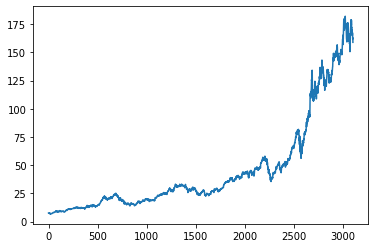

In [ ]:
plt.plot(df.Close)

In [ ]:
ma100=df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3095    169.37320
3096    169.46930
3097    169.48480
3098    169.46060
3099    169.40185
Name: Close, Length: 3100, dtype: float64

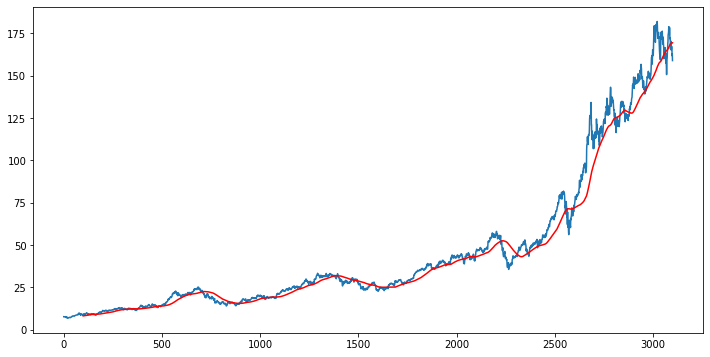

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [ ]:
ma200=df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3095    158.771000
3096    158.880250
3097    158.973000
3098    159.061850
3099    159.133825
Name: Close, Length: 3100, dtype: float64

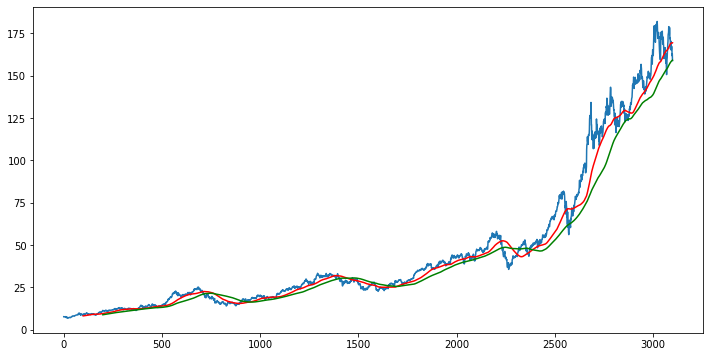

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
df.shape

(3100, 5)

In [ ]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2170, 1)
(930, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.0171612 ],
       [0.01745035],
       [0.01478552],
       ...,
       [0.99250559],
       [0.99731951],
       [1.        ]])

In [ ]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
#ML model Starts here


In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model=Sequential()
model.add(LSTM(units=50,activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
65/65 [==============================] - 30s 351ms/step - loss: 0.0373
Epoch 2/50
65/65 [==============================] - 20s 314ms/step - loss: 0.0080
Epoch 3/50
65/65 [==============================] - 18s 278ms/step - loss: 0.0070
Epoch 4/50
65/65 [==============================] - 19s 297ms/step - loss: 0.0052
Epoch 5/50
65/65 [==============================] - 18s 279ms/step - loss: 0.0060
Epoch 6/50
65/65 [==============================] - 18s 279ms/step - loss: 0.0051
Epoch 7/50
65/65 [==============================] - 18s 280ms/step - loss: 0.0046
Epoch 8/50
65/65 [==============================] - 18s 280ms/step - loss: 0.0050
Epoch 9/50
65/65 [==============================] - 18s 281ms/step - loss: 0.0047
Epoch 10/50
65/65 [==============================] - 18s 278ms/step - loss: 0.0038
Epoch 11/50
65/65 [==============================] - 18s 283ms/step - loss: 0.0040
Epoch 12/50
65/65 [==============================] - 18s 279ms/step - loss: 0.0036
Epoch 13/50
6

In [ ]:
model.save('keras_model.h5')

In [ ]:
past_100_days=data_training.tail(100)

In [ ]:
final_df=past_100_days.append(data_testing,ignore_index=True)

In [ ]:
final_df.head()

,Close
0,43.192501
1,42.084999
2,41.619999
3,41.945000
4,41.669998


In [ ]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.05219767],
       [0.04463599],
       [0.04146112],
       ...,
       [0.86194417],
       [0.86938643],
       [0.84217809]])

In [ ]:
input_data.shape

(1030, 1)

In [ ]:

x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [ ]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(930, 100, 1)
(930,)


In [ ]:
#Making Predictions

y_predicted=model.predict(x_test)


In [ ]:
y_predicted.shape

(930, 1)

In [ ]:
y_predicted

In [ ]:
scaler.scale_

array([0.00682769])

In [ ]:
scale_factor=1/0.02099517
y_predicted=y_predicted*scale_factor
y_test = y_test*scale_factor

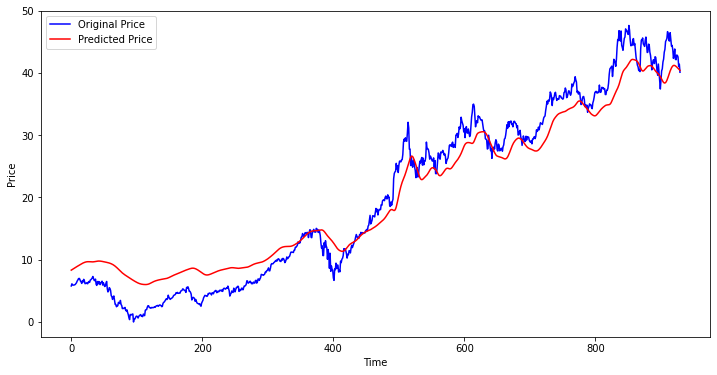

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()